<a href="https://colab.research.google.com/github/Himagination/time_series/blob/main/Time_Series_Analysis_ETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformations of Time Series

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [3]:
df = pd.read_csv("airline_passengers.csv", 
                 index_col="Month", 
                 parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


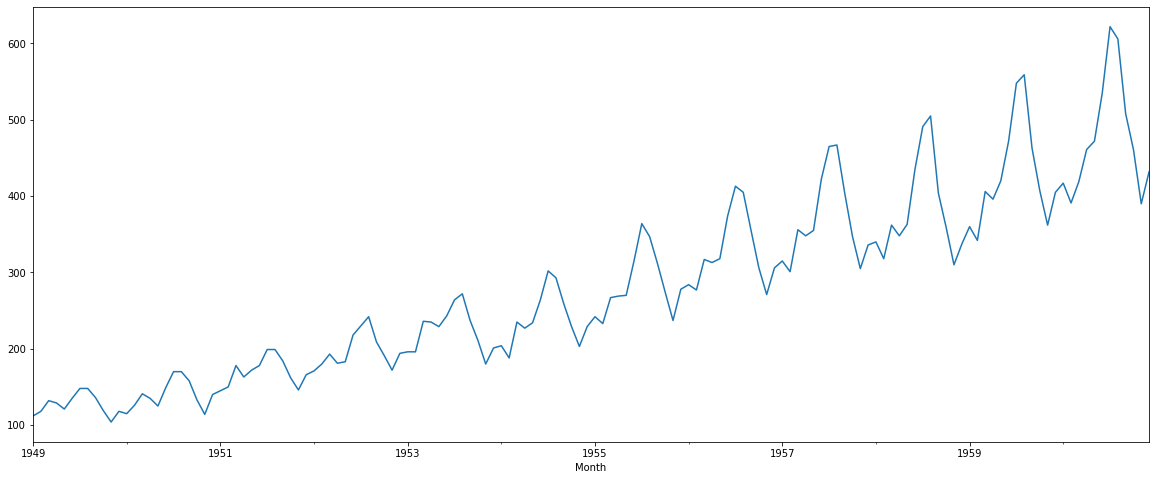

In [4]:
df["Passengers"].plot(figsize=(20, 8))

**Points to note:**

- There is a trend. Time series is going upward and towards riight.
- There is a seasonality. There is a repeating pattern in time.
- The amplitude of seasonal pattern increases with time.

In [5]:
df["SqrtPassengers"] = np.sqrt(df["Passengers"])

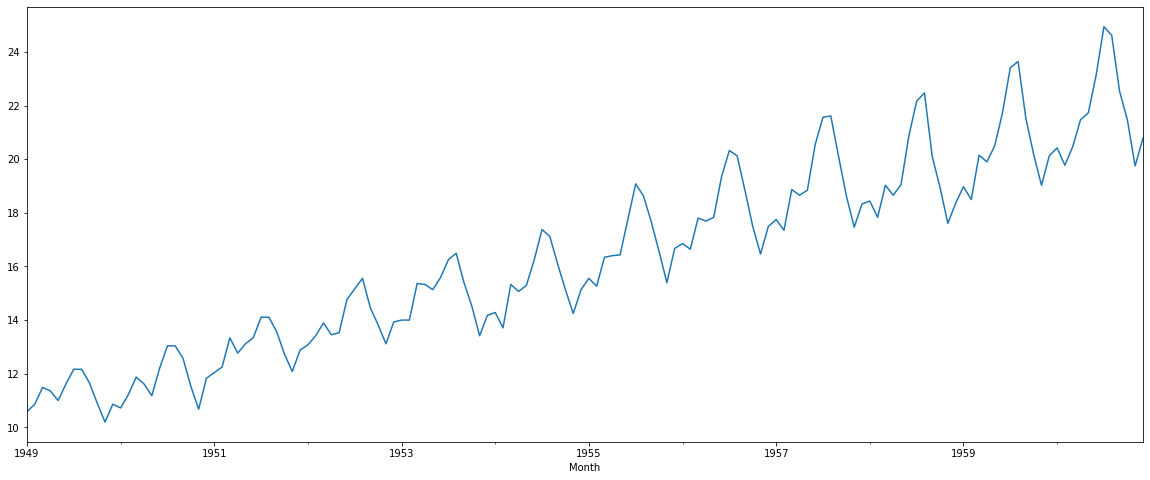

In [6]:
df["SqrtPassengers"].plot(figsize=(20, 8))

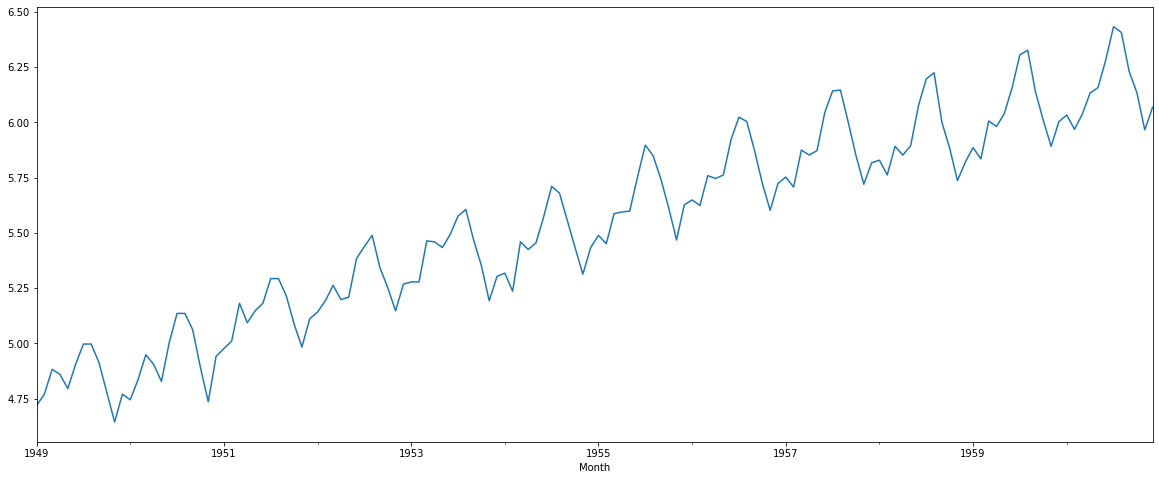

In [7]:
df["LogPassengers"] = np.log(df["Passengers"])
df["LogPassengers"].plot(figsize=(20, 8))

0.14802265137037945


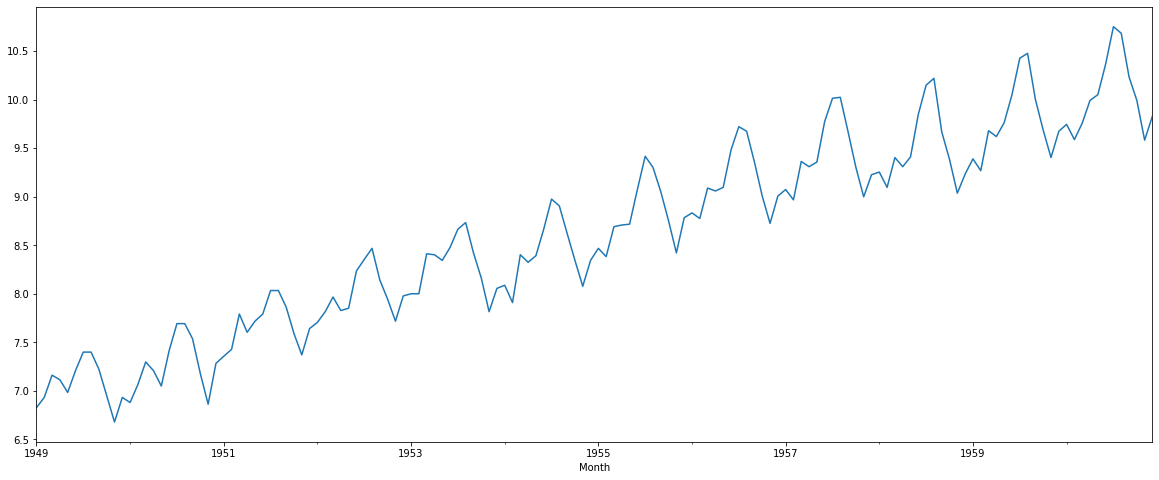

In [8]:
data, lambda_ = boxcox(df["Passengers"])
print(lambda_)
df["BoxCoxPassengers"] = data
df["BoxCoxPassengers"].plot(figsize=(20, 8))

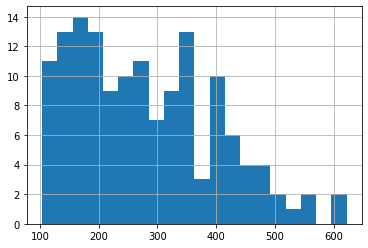

In [9]:
df["Passengers"].hist(bins=20);

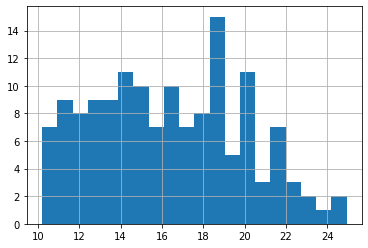

In [10]:
df["SqrtPassengers"].hist(bins=20);

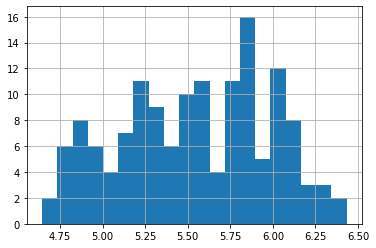

In [11]:
df["LogPassengers"].hist(bins=20);

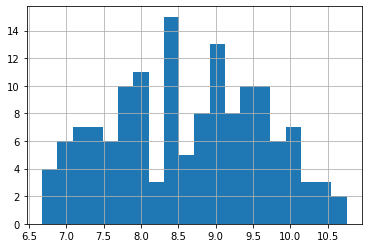

In [12]:
df["BoxCoxPassengers"].hist(bins=20);

# Price Simulation

In [13]:
# Number of time steps
T = 1000
# Initial Price
P0 = 10
# Drift
mu = 0.001

In [14]:
# Last log price
last_p = np.log(P0)

log_returns = np.zeros(T)
prices = np.zeros(T)
for t in range(T):
  # Sample a log return
  r = 0.01 * np.random.randn()
  # Compute the new log price
  p = last_p + mu + r
  # Store the return and price
  log_returns[t] = r + mu
  prices[t] = np.exp(p)
  # assign last_p
  last_p = p

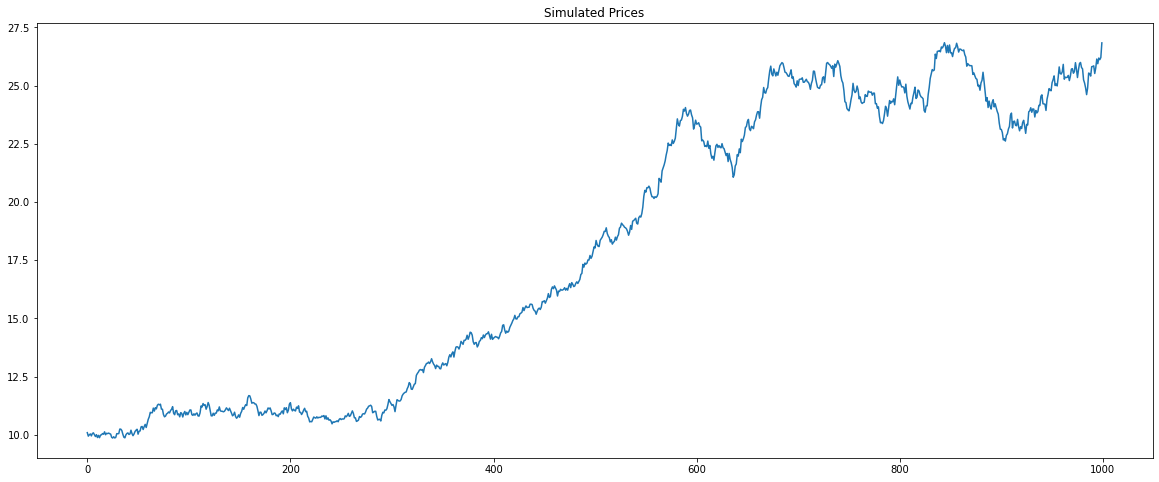

In [15]:
plt.figure(figsize=(20, 8))
plt.plot(prices)
plt.title("Simulated Prices");

# Naive Forecast

In [16]:
!pip install -U scikit-learn

In [17]:
from sklearn.metrics import mean_absolute_percentage_error, \
mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import pandas as pd

In [18]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

File ‘SPY.csv’ already there; not retrieving.



In [19]:
df = pd.read_csv("SPY.csv", index_col="Date", parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [20]:
# In Naive Forecast, we simply predicts previous value, hence "shift(1)" is used.
df["ClosePrediction"] = df['Close'].shift(1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,ClosePrediction
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,113.330002
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,113.629997
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,113.709999
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,114.190002


In [21]:
y_true = df.iloc[1:]["Close"]
y_pred = df.iloc[1:]["ClosePrediction"]

## Metrics

In [22]:
# SSE
(y_true - y_pred).dot(y_true - y_pred)

6330.3742894926045

In [23]:
# MSE
mean_squared_error(y_true, y_pred)

2.798573956451196

In [24]:
# MSE without using built-in
(y_true - y_pred).dot(y_true - y_pred) / len(y_true)

2.7985739564511958

In [25]:
# RMSE
mean_squared_error(y_true, y_pred, squared=False)

1.672893886787562

In [26]:
# RMSE without built-in
np.sqrt((y_true - y_pred).dot(y_true - y_pred) / len(y_true))

1.6728938867875618

In [27]:
# MAE
mean_absolute_error(y_true, y_pred)

1.1457559803120336

In [28]:
# R-squared
r2_score(y_true, y_pred)

0.9989603259063914

In [29]:
# MAPE
mean_absolute_percentage_error(y_true, y_pred)

0.006494073151422373

In [30]:
# sMAPE
def smape(y_true, y_pred):
  numerator = np.abs(y_true - y_pred)
  denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
  ratio = numerator/denominator
  return ratio.mean()

smape(y_true, y_pred)

0.006491365814068418

# Simple Moving Average(SMA)

In [31]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

File ‘sp500_close.csv’ already there; not retrieving.



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
close = pd.read_csv("sp500_close.csv", index_col=0, parse_dates=True)
goog = close[["GOOG"]].copy().dropna()

In [34]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


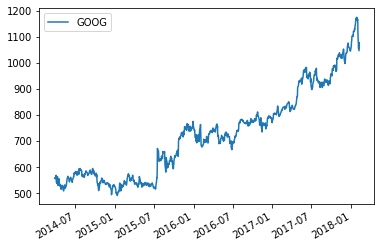

In [35]:
goog.plot();

In [36]:
goog_ret = np.log(goog.pct_change(1) + 1)

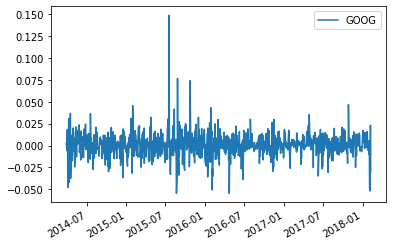

In [37]:
goog_ret.plot();

In [38]:
goog["SMA-10"] = goog["GOOG"].rolling(10).mean()
goog.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


In [39]:
type(goog["GOOG"].rolling(10))

pandas.core.window.rolling.Rolling

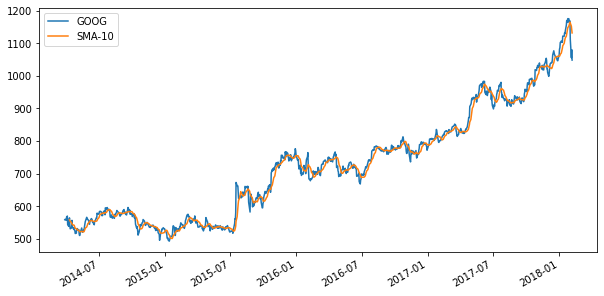

In [40]:
goog.plot(figsize=(10, 5));

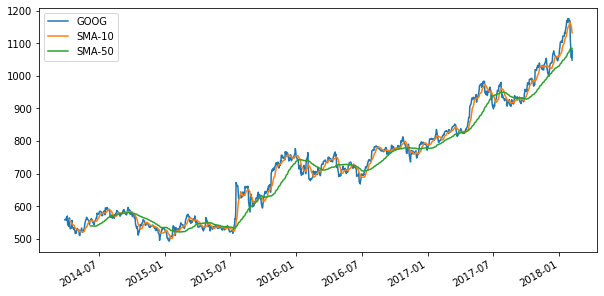

In [41]:
goog["SMA-50"] = goog["GOOG"].rolling(50).mean()
goog.plot(figsize=(10, 5));

In [42]:
goog_aapl = close[["GOOG", "AAPL"]].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [43]:
cov.loc["2018-02-07"].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [44]:
goog_aapl_ret = np.log(1 + goog_aapl.pct_change(1))
goog_aapl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [45]:
goog_aapl_ret["GOOG-SMA-50"] = goog_aapl_ret["GOOG"].rolling(50).mean()
goog_aapl_ret["AAPL-SMA-50"] = goog_aapl_ret["AAPL"].rolling(50).mean()

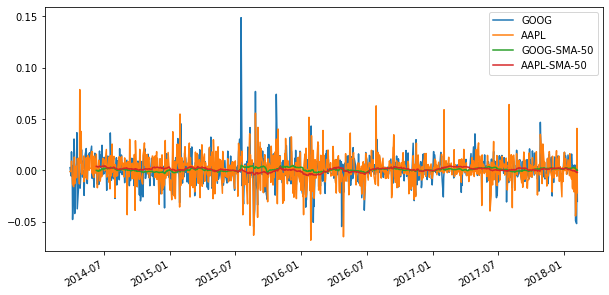

In [46]:
goog_aapl_ret.plot(figsize=(10, 5));

In [47]:
cov = goog_aapl_ret[["GOOG", "AAPL"]].rolling(50).cov()
cov.tail()

GOOG      AAPL
2018-02-05 AAPL  0.000110  0.000143
2018-02-06 GOOG  0.000193  0.000129
           AAPL  0.000129  0.000177
2018-02-07 GOOG  0.000212  0.000142
           AAPL  0.000142  0.000185

In [48]:
corr = goog_aapl_ret[["GOOG", "AAPL"]].rolling(50).corr()
corr.tail(16)

GOOG      AAPL
2018-01-29 GOOG  1.000000  0.531436
           AAPL  0.531436  1.000000
2018-01-30 GOOG  1.000000  0.525389
           AAPL  0.525389  1.000000
2018-01-31 GOOG  1.000000  0.515233
           AAPL  0.515233  1.000000
2018-02-01 GOOG  1.000000  0.510051
           AAPL  0.510051  1.000000
2018-02-02 GOOG  1.000000  0.671209
           AAPL  0.671209  1.000000
2018-02-05 GOOG  1.000000  0.681098
           AAPL  0.681098  1.000000
2018-02-06 GOOG  1.000000  0.700564
           AAPL  0.700564  1.000000
2018-02-07 GOOG  1.000000  0.716376
           AAPL  0.716376  1.000000

# Exponentially-Weighted Moving Average(EWMA)

In [49]:
# The DATA
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv
df = pd.read_csv("airline_passengers.csv", 
                 index_col="Month", 
                 parse_dates=True)
df.head()

File ‘airline_passengers.csv’ already there; not retrieving.



,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [50]:
# Check for NA
df.isna().sum()

Passengers    0
dtype: int64

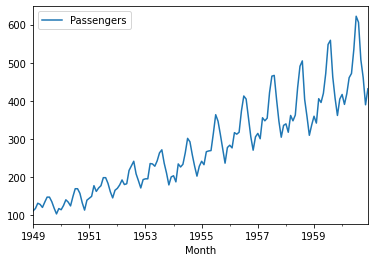

In [51]:
df.plot();

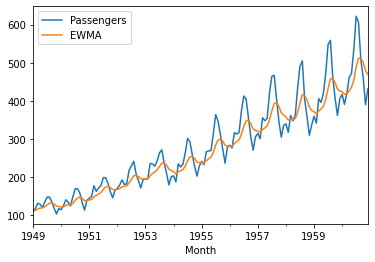

In [52]:
alpha = 0.2
df["EWMA"] = df["Passengers"].ewm(alpha=alpha, 
                                  adjust=False).mean()
df.plot();

In [53]:
# EWMA without built-in
manual_ewma = []
for x in df["Passengers"].to_numpy():
  if len(manual_ewma) > 0:
    xhat = alpha * x + (1 - alpha) * manual_ewma[-1]
  else:
    xhat = x
  manual_ewma.append(xhat)
df["Manual"] = manual_ewma

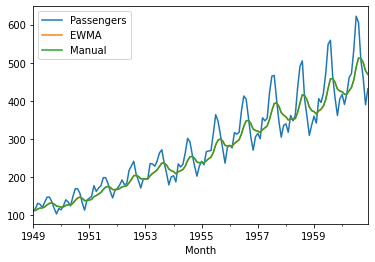

In [54]:
df.plot();

In [55]:
df.drop("Manual", axis=1, inplace=True)

## Simple Exponential Smoothing(SES)

In [56]:
!pip install -U statsmodels

In [57]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [58]:
ses = SimpleExpSmoothing(df["Passengers"])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
df.index.freq = "MS" # "MS" means months

In [60]:
ses = SimpleExpSmoothing(
    df["Passengers"], 
    initialization_method="legacy-heuristic")

In [61]:
res = ses.fit(smoothing_level=alpha, optimized=False)
res

In [62]:
res.predict(start=df.index[0], 
            end=df.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.200000
1949-04-01    116.960000
1949-05-01    119.368000
                 ...    
1960-08-01    488.767616
1960-09-01    512.214093
1960-10-01    511.371274
1960-11-01    501.297019
1960-12-01    479.037615
Freq: MS, Length: 144, dtype: float64

In [63]:
df["SES"] = res.predict(start=df.index[0], 
                        end=df.index[-1])

In [64]:
np.allclose(df["SES"], res.fittedvalues)

True

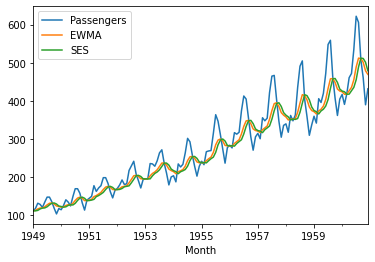

In [65]:
df.plot();

In [66]:
df["SES-1"] = df["SES"].shift(-1)

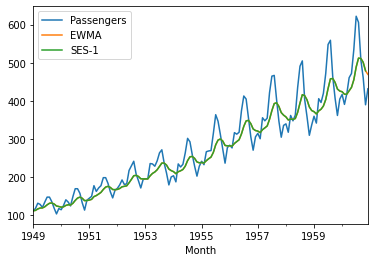

In [67]:
df[["Passengers", "EWMA", "SES-1"]].plot();

**Above plot MUST not be used. As, it's not as per philosophy of SES.**

In [68]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [69]:
ses = SimpleExpSmoothing(
    train["Passengers"], 
    initialization_method="legacy-heuristic"
)
res = ses.fit()

In [70]:
# Boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

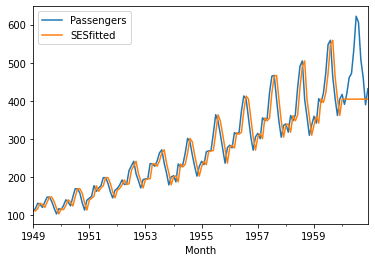

In [71]:
df.loc[train_idx, "SESfitted"] = res.fittedvalues
df.loc[test_idx, "SESfitted"] = res.forecast(N_test)
df[["Passengers", "SESfitted"]].plot();

In [72]:
res.params

{'damping_trend': nan,
 'initial_level': 112.0,
 'initial_seasons': array([], dtype=float64),
 'initial_trend': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.995,
 'smoothing_seasonal': nan,
 'smoothing_trend': nan,
 'use_boxcox': False}

## Holt's Linear Trend Model

In [73]:
from statsmodels.tsa.holtwinters import Holt

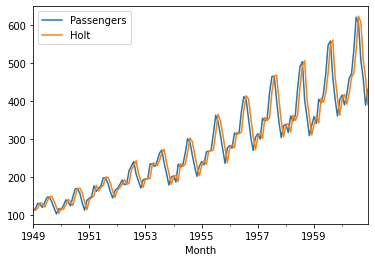

In [74]:
holt = Holt(
    df["Passengers"], 
    initialization_method="legacy-heuristic"
)
res_h = holt.fit()
df["Holt"] = res_h.fittedvalues
df[["Passengers", "Holt"]].plot();

In [75]:
holt = Holt(train["Passengers"], 
            initialization_method="legacy-heuristic")
res_h = holt.fit()
df.loc[train_idx, "Holt"] = res_h.fittedvalues

In [76]:
df.loc[test_idx, "Holt"] = res_h.forecast(N_test)

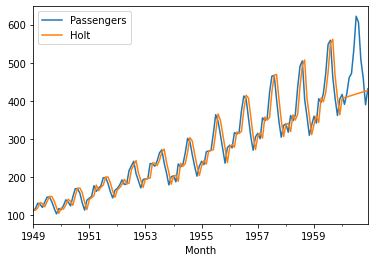

In [77]:
df[["Passengers", "Holt"]].plot();

## Holt-Winter's Model

In [78]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [79]:
hw = ExponentialSmoothing(
    train["Passengers"], 
    initialization_method="legacy-heuristic", 
    trend="add", 
    seasonal="add", 
    seasonal_periods=12
)
res_hw = hw.fit()

In [80]:
df.loc[train_idx, "HoltWinters"] = res_hw.fittedvalues

In [81]:
df.loc[test_idx, "HoltWinters"] = res_hw.forecast(N_test)

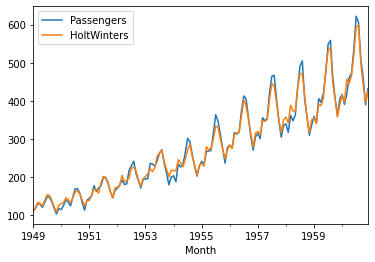

In [82]:
df[["Passengers", "HoltWinters"]].plot();

In [83]:
def rmse(y, t):
  return np.sqrt(np.mean((y-t)**2))

In [84]:
def mae(y, t):
  return np.mean(np.abs(y-t))

In [85]:
print("Train RMSE:", rmse(train["Passengers"], res_hw.fittedvalues))
print("Test RMSE:", rmse(test["Passengers"], res_hw.forecast(N_test)))

Train RMSE: 11.62468020352184
Test RMSE: 16.980141553924987


In [86]:
print("Train MAE:", mae(train["Passengers"], res_hw.fittedvalues))
print("Test MAE:", mae(test["Passengers"], res_hw.forecast(N_test)))

Train MAE: 9.008020518796009
Test MAE: 13.380801732365692


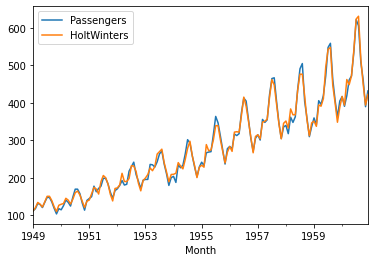

In [87]:
hw = ExponentialSmoothing(
    train["Passengers"], 
    initialization_method="legacy-heuristic", 
    trend="add", 
    seasonal="mul", 
    seasonal_periods=12
)
res_hw = hw.fit()
df.loc[train_idx, "HoltWinters"] = res_hw.fittedvalues
df.loc[test_idx, "HoltWinters"] = res_hw.forecast(N_test)
df[["Passengers", "HoltWinters"]].plot();

In [88]:
print("Train RMSE:", rmse(train["Passengers"], res_hw.fittedvalues))
print("Test RMSE:", rmse(test["Passengers"], res_hw.forecast(N_test)))

Train RMSE: 9.767995558539946
Test RMSE: 15.810835822154257


In [89]:
print("Train MAE:", mae(train["Passengers"], res_hw.fittedvalues))
print("Test MAE:", mae(test["Passengers"], res_hw.forecast(N_test)))

Train MAE: 7.604312485557862
Test MAE: 10.30364155047729


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


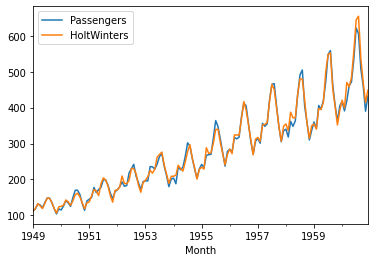

In [90]:
hw = ExponentialSmoothing(
    train["Passengers"], 
    initialization_method="legacy-heuristic", 
    trend="mul", 
    seasonal="mul", 
    seasonal_periods=12
)
res_hw = hw.fit()
df.loc[train_idx, "HoltWinters"] = res_hw.fittedvalues
df.loc[test_idx, "HoltWinters"] = res_hw.forecast(N_test)
df[["Passengers", "HoltWinters"]].plot();

In [91]:
print("Train RMSE:", rmse(train["Passengers"], res_hw.fittedvalues))
print("Test RMSE:", rmse(test["Passengers"], res_hw.forecast(N_test)))

Train RMSE: 9.617924854512014
Test RMSE: 25.806200661564787


In [92]:
print("Train MAE:", mae(train["Passengers"], res_hw.fittedvalues))
print("Test MAE:", mae(test["Passengers"], res_hw.forecast(N_test)))

Train MAE: 7.112440059345803
Test MAE: 20.84421181140488


# Walk-forward Validation

In [93]:
import itertools

In [94]:
# Assume the forecat horizon we care about is 12
# Validate over 10 steps
h = 12
steps = 10
Ntest = len(df) - h - steps + 1

In [95]:
# Configuration Hyperparameter to try
trend_type_list = ["add", "mul"]
seasonal_type_list = ["add", "mul"]
damped_trend_list = [True, False]
init_method_list = ["estimated", "heuristic", "legacy-heuristic"]
use_boxcos_list = [True, False, 0]

In [96]:
def walkforward(
    trend_type, 
    seasonal_type, 
    damped_trend, 
    init_method, 
    use_boxcox, 
    debug=False):
  
  # Store Errors
  errors = []
  seen_last = []
  steps_completed = 0

  for end_of_train in range(Ntest, len(df) - h + 1):
    train = df.iloc[:end_of_train]
    test = df.iloc[end_of_train:end_of_train + h]

    if test.index[-1] == df.index[-1]:
      seen_last = True

    steps_completed += 1

    hw = ExponentialSmoothing(
        train["Passengers"], 
        initialization_method=init_method, 
        trend=trend_type, 
        damped_trend=damped_trend, 
        seasonal=seasonal_type, 
        seasonal_periods=12, 
        use_boxcox=use_boxcox
    )
    res_hw = hw.fit()

    # Compute error for the forecast horizon
    fcast = res_hw.forecast(h)
    error = mean_squared_error(test["Passengers"], fcast)
    errors.append(error)

  if debug:
    print("seen_last:", seen_last)
    print("steps completed:", steps_completed)

  return np.mean(errors)

In [97]:
# Test function
walkforward("add", "add", False, "legacy-heuristic", 0, debug=True)

seen_last: True
steps completed: 10


2521.0286697881224

In [98]:
# Iterate through all possible options (i.e grid search)
tuple_of_option_lists = (
    trend_type_list, 
    seasonal_type_list, 
    damped_trend_list, 
    init_method_list, 
    use_boxcos_list
)

for x in itertools.product(*tuple_of_option_lists):
  print(x)

('add', 'add', True, 'estimated', True)
('add', 'add', True, 'estimated', False)
('add', 'add', True, 'estimated', 0)
('add', 'add', True, 'heuristic', True)
('add', 'add', True, 'heuristic', False)
('add', 'add', True, 'heuristic', 0)
('add', 'add', True, 'legacy-heuristic', True)
('add', 'add', True, 'legacy-heuristic', False)
('add', 'add', True, 'legacy-heuristic', 0)
('add', 'add', False, 'estimated', True)
('add', 'add', False, 'estimated', False)
('add', 'add', False, 'estimated', 0)
('add', 'add', False, 'heuristic', True)
('add', 'add', False, 'heuristic', False)
('add', 'add', False, 'heuristic', 0)
('add', 'add', False, 'legacy-heuristic', True)
('add', 'add', False, 'legacy-heuristic', False)
('add', 'add', False, 'legacy-heuristic', 0)
('add', 'mul', True, 'estimated', True)
('add', 'mul', True, 'estimated', False)
('add', 'mul', True, 'estimated', 0)
('add', 'mul', True, 'heuristic', True)
('add', 'mul', True, 'heuristic', False)
('add', 'mul', True, 'heuristic', 0)
('add

In [99]:
best_score = float("inf")
best_options = None
for x in itertools.product(*tuple_of_option_lists):
  score = walkforward(*x)

  if score < best_score:
    print(f"Best Score so far: {score}")
    best_score = score
    best_options = x

Best Score so far: 412.81725610908535
Best Score so far: 412.7068547310978
Best Score so far: 320.66412754016744


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

Best Score so far: 304.78117789850313


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

Best Score so far: 301.18523410990747


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

In [100]:
print(f"Best Score: {best_score}")
trend_type, seasonal_type, damped_trend, init_method, use_boxcox = best_options
print(f"Trend Type: {trend_type}")
print(f"Seasonal Type: {seasonal_type}")
print(f"Damped Type: {damped_trend}")
print(f"Initialization Method: {init_method}")
print(f"Use Boxcox: {use_boxcox}")

Best Score: 301.18523410990747
Trend Type: mul
Seasonal Type: add
Damped Type: False
Initialization Method: legacy-heuristic
Use Boxcox: False


# Application: Sales Data

In [101]:
# The DATA
!wget -nc  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

File ‘perrin-freres-monthly-champagne.csv’ already there; not retrieving.



In [102]:
!head perrin-freres-monthly-champagne.csv

Month,Perrin Freres monthly champagne sales millions ?64-?72
1964-01,2815
1964-02,2672
1964-03,2755
1964-04,2721
1964-05,2946
1964-06,3036
1964-07,2282
1964-08,2212
1964-09,2922


In [103]:
df = pd.read_csv(
    "perrin-freres-monthly-champagne.csv", 
    index_col="Month", 
    skipfooter=2, 
    parse_dates=True
)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [104]:
df.columns = ["Sales"]

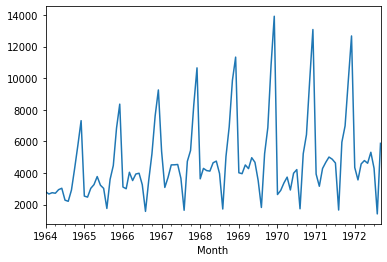

In [105]:
df["Sales"].plot();

In [106]:
df.index.freq = "MS"

In [107]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]
# Boolean Series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [108]:
hw = ExponentialSmoothing(
    train["Sales"], 
    initialization_method="legacy-heuristic", 
    trend="add", 
    seasonal="add", 
    seasonal_periods=12
)
res_hw = hw.fit()

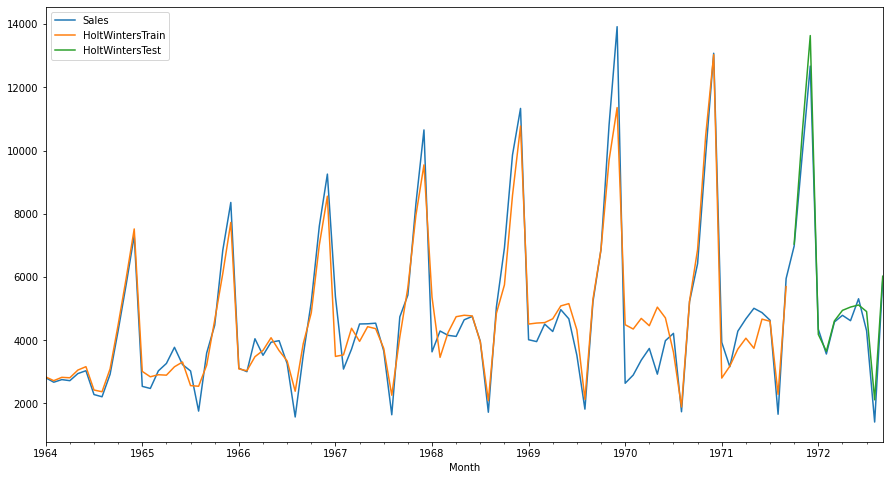

In [109]:
df.loc[train_idx, "HoltWintersTrain"] = res_hw.fittedvalues
df.loc[test_idx, "HoltWintersTest"] = res_hw.forecast(Ntest)
df[["Sales", "HoltWintersTrain", "HoltWintersTest"]].plot(figsize=(15, 8));

In [110]:
r2_score(train["Sales"], res_hw.fittedvalues)

0.9173433418354158

In [111]:
r2_score(test["Sales"], res_hw.forecast(N_test))

0.9735679986862097

# Applications: Stock Prices

In [112]:
# The DATA
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv
!head sp500sub.csv

File ‘sp500sub.csv’ already there; not retrieving.

Date,Open,High,Low,Close,Adj Close,Volume,Name
2010-01-04,9.220000267028807,9.510000228881836,9.170000076293944,9.5,9.5,1865400.0,INCY
2010-01-05,9.510000228881836,10.289999961853027,9.449999809265137,10.270000457763672,10.270000457763672,7608900.0,INCY
2010-01-06,10.380000114440918,11.09000015258789,10.350000381469727,11.0,11.0,8046700.0,INCY
2010-01-07,11.0,11.0600004196167,10.619999885559082,10.81999969482422,10.81999969482422,3680300.0,INCY
2010-01-08,10.81999969482422,11.0,10.75,10.9399995803833,10.9399995803833,1529300.0,INCY
2010-01-11,10.960000038146973,11.239999771118164,10.880000114440918,11.09000015258789,11.09000015258789,2280600.0,INCY
2010-01-12,10.989999771118164,11.0,10.34000015258789,10.359999656677246,10.359999656677246,4204600.0,INCY
2010-01-13,10.359999656677246,10.460000038146973,10.039999961853027,10.329999923706056,10.329999923706056,2134900.0,INCY
2010-01-14,10.3100004196167,10.390000343322754,10.07999992370605

In [113]:
df = pd.read_csv("sp500sub.csv", 
                 index_col="Date", 
                 parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


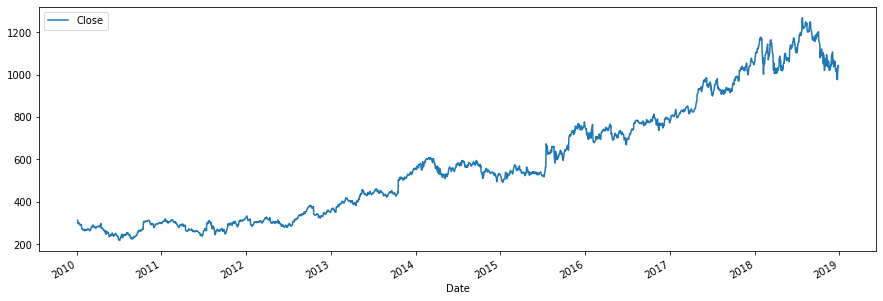

In [114]:
goog = df[df["Name"] == "GOOG"][["Close"]].copy()
goog.plot(figsize=(15, 5));

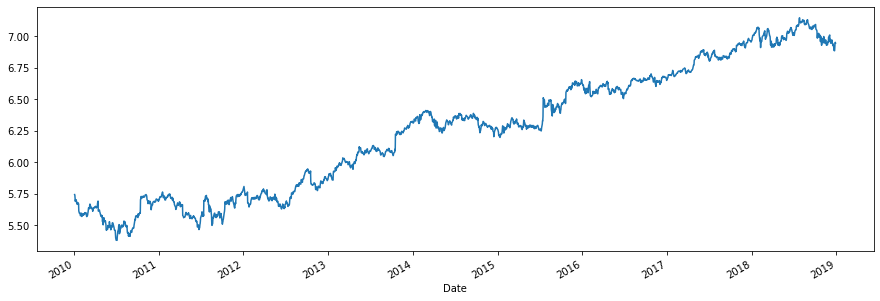

In [115]:
goog["LogClose"] = np.log(goog["Close"])
goog["LogClose"].plot(figsize=(15, 5))

In [116]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]
# Boolean Series to index df rows
train_idx = goog.index <= train.index[-1]
test_idx = goog.index > train.index[-1]

In [117]:
hw = ExponentialSmoothing(
    train["LogClose"], 
    initialization_method="legacy-heuristic", 
    trend="add", 
    seasonal=None
)
res_hw = hw.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


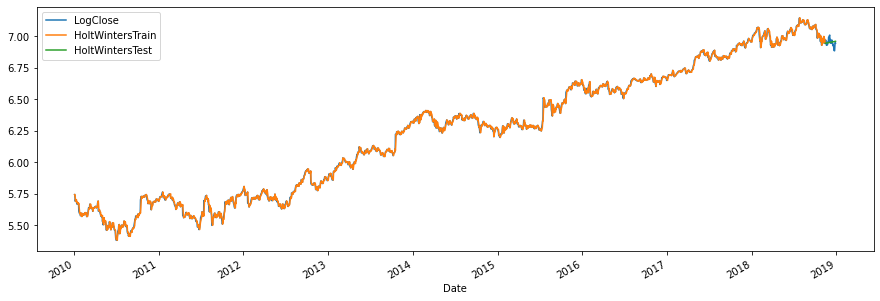

In [118]:
goog.loc[train_idx, "HoltWintersTrain"] = res_hw.fittedvalues
goog.loc[test_idx, "HoltWintersTest"] = res_hw.forecast(Ntest).to_numpy()
goog[["LogClose", "HoltWintersTrain", "HoltWintersTest"]].plot(figsize=(15, 5));

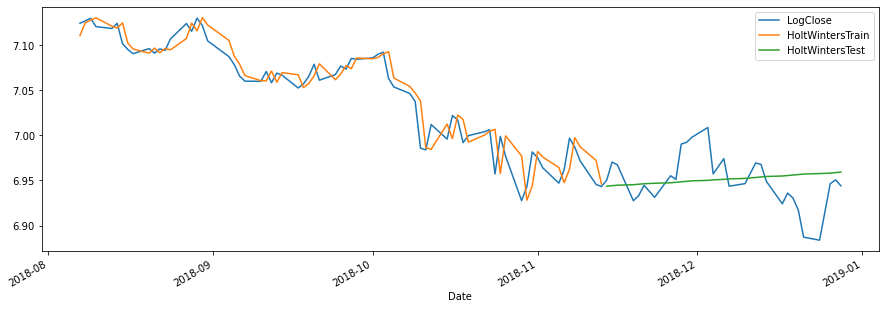

In [119]:
cols = ["LogClose", "HoltWintersTrain", "HoltWintersTest"]
goog.iloc[-100:][cols].plot(figsize=(15, 5));

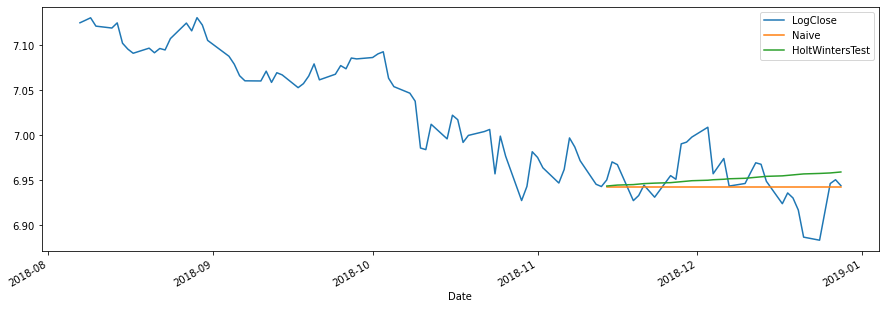

In [120]:
goog.loc[test_idx, "Naive"] = train.iloc[-1]["LogClose"]
goog.iloc[-100:][["LogClose", "Naive", "HoltWintersTest"]].plot(figsize=(15, 5));

In [121]:
r2_score(goog.loc[test_idx, "LogClose"], goog.loc[test_idx, "Naive"])

-0.06454209862026317

In [122]:
r2_score(goog.loc[test_idx, "LogClose"], goog.loc[test_idx, "HoltWintersTest"])

-0.1587652478748407